In [1]:
import torch
import utils
import dlc_practical_prologue as prologue

from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from itertools import product

#from utils import train_model
#from utils_mt import accuracy_mt, train_model_mt
from dataset import DataSet, plot_hist

In [2]:
def load_data():
    train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(1000)
    return Variable(train_input), Variable(train_target), Variable(train_classes), Variable(test_input), Variable(test_target), Variable(test_classes)
    
train_input, train_target, train_classes, \
test_input, test_target, test_classes \
= load_data()

print ("Train : ", \
       "\n  input   : ", train_input.shape,\
       "\n  target  : ", train_target.shape, \
       "\n  aux     : ", train_classes.shape)
print ("Test : ", \
       "\n  input   : ", test_input.shape,\
       "\n  target  : ", test_target.shape, \
       "\n  aux     : ", test_classes.shape)

/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Train :  
  input   :  torch.Size([1000, 2, 14, 14]) 
  target  :  torch.Size([1000]) 
  aux     :  torch.Size([1000, 2])
Test :  
  input   :  torch.Size([1000, 2, 14, 14]) 
  target  :  torch.Size([1000]) 
  aux     :  torch.Size([1000, 2])


## Prettier way

In [3]:
d = DataSet(
    train_input, train_target, train_classes,
    test_input, test_target, test_classes,
    validationProp=0.2, batchsize=100,
    mainLoss=nn.CrossEntropyLoss(),
    auxLoss=nn.CrossEntropyLoss()
)

trn : torch.Size([1000, 2, 14, 14]) 
trnY : torch.Size([1000]) 
trnAuxY : torch.Size([2, 1000])


In [4]:
class Net(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(Net, self).__init__()
        
        # weight shared part
        self.conv1 = nn.Conv2d(1, 32, kernel_size=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(512, nb_hidden)        
        self.fc2 = nn.Linear(nb_hidden, 10)
        
        # unified part
        self.fc3 = nn.Linear(20, 32)
        self.fc4 = nn.Linear(32, 2)
        
    
    def fw_aux (self, x_aux) :
        x = x_aux
        #print ("x_aux : ", x_aux.shape)
        x = self.conv1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv2(x)
        #print ("-> ", x.shape)
        x = self.pool1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv3(x)
        #print ("-> ", x.shape)
        x = self.pool2(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc1(x.view(-1, 512))
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc2(x)
        #print ("returning ", x.shape)
        #print ("returning ", x[0,0].type())
        return x

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
        #print ( "x : ", x.shape)
        #print ( "x1 : ", x1.shape)
        #print ( "x2 : ", x2.shape)
        
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.fw_aux(x1)
        x2_aux = self.fw_aux(x2)
        #print ( "x1_aux : ", x1_aux.shape)
        #print ( "x2_aux : ", x2_aux.shape)
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        #print ( "x_main : ", x_main.shape)
        x_main = F.relu(self.fc3(x_main))
        x_main = self.fc4(x_main)
        
        # Return both auxiliary tasks and primary task results
        #clear_output(wait=True)
        #print ( "fw")
        #print (x_main)
        return x_main, (x1_aux, x2_aux)

Epoch 1/40
Epoch 11/40
Epoch 21/40
Epoch 31/40


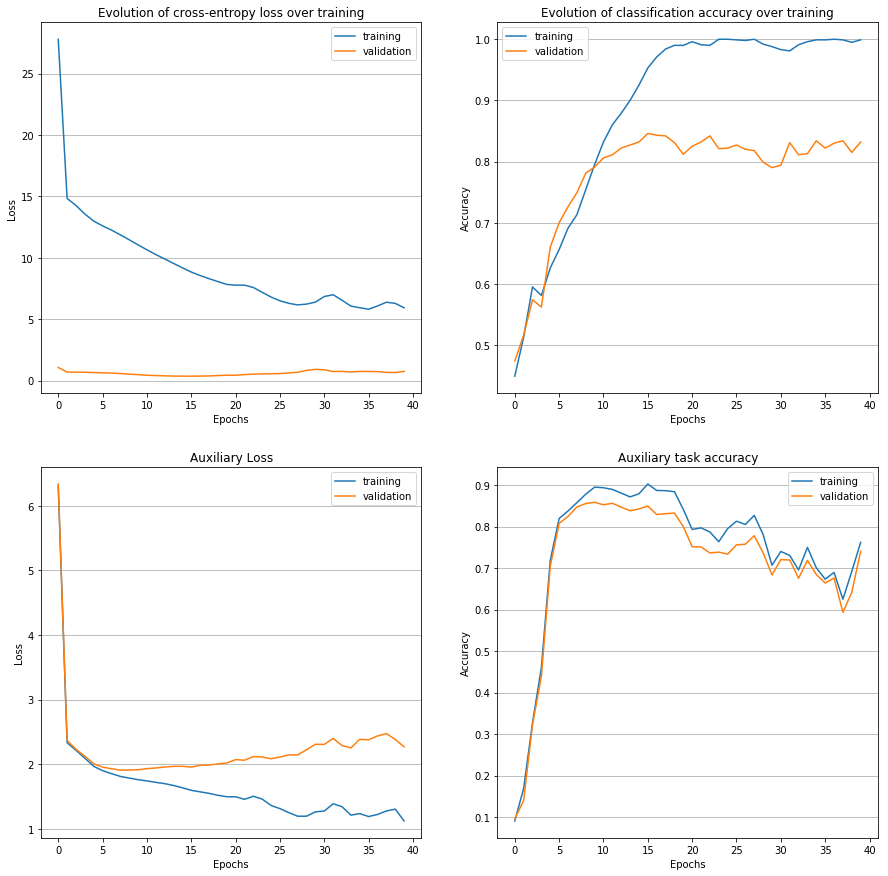

In [5]:
net = Net()
histogram = d.trainModel(net, epochs=40, auxLossWeight=0.5)
plot_hist(histogram)

Epoch 1/40
Epoch 11/40
Epoch 21/40
Epoch 31/40


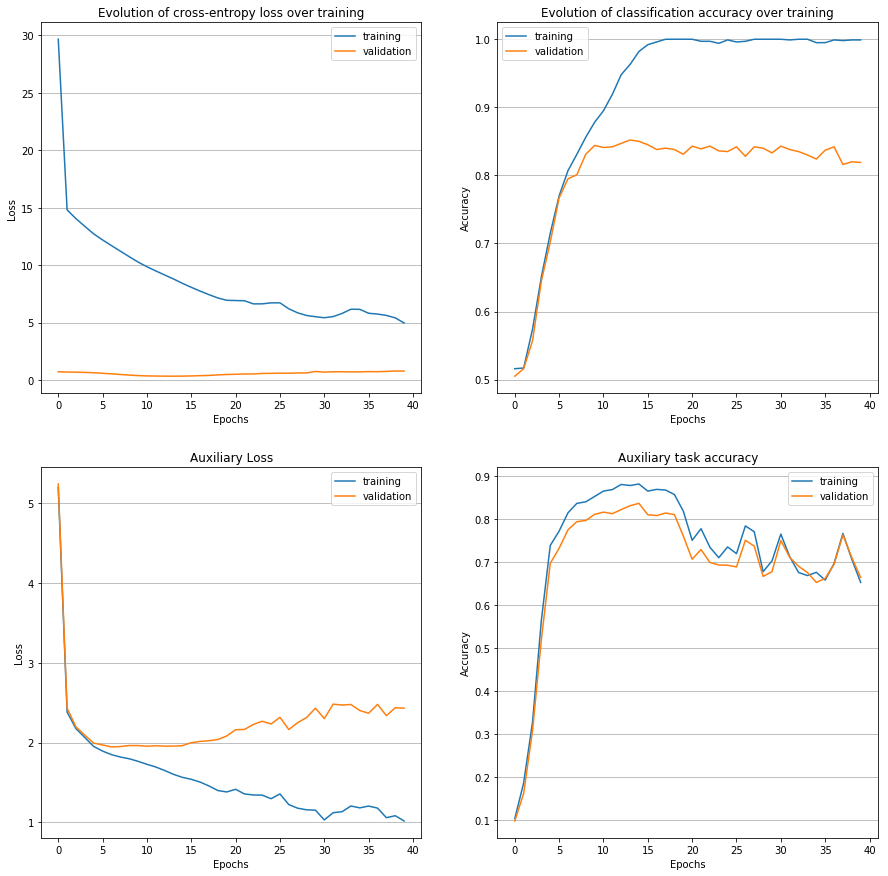

In [6]:
net = Net()
histogram = d.trainModel(net, epochs=40, auxLossWeight=0.2)
plot_hist(histogram)

In [ ]:
net = Net()
histogram = d.trainModel(net, epochs=40, auxLossWeight=0.01)
plot_hist(histogram)

Epoch 1/40


## Ugly way

In [ ]:
raise Exception("Stop")

In [ ]:
#trAuxY = train_classes.reshape((2, 1000))
trAuxY = train_classes.transpose(dim0=0, dim1=1)
teAuxY = test_classes.transpose(dim0=0, dim1=1)
trAuxY

In [ ]:
class Net(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(Net, self).__init__()
        
        # weight shared part
        self.conv1 = nn.Conv2d(1, 32, kernel_size=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(512, nb_hidden)        
        self.fc2 = nn.Linear(nb_hidden, 10)
        
        # unified part
        self.fc3 = nn.Linear(20, 32)
        self.fc4 = nn.Linear(32, 2)
        
    
    def fw_aux (self, x_aux) :
        x = x_aux
        #print ("x_aux : ", x_aux.shape)
        x = self.conv1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv2(x)
        #print ("-> ", x.shape)
        x = self.pool1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv3(x)
        #print ("-> ", x.shape)
        x = self.pool2(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc1(x.view(-1, 512))
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc2(x)
        #print ("returning ", x.shape)
        #print ("returning ", x[0,0].type())
        return x

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
        #print ( "x : ", x.shape)
        #print ( "x1 : ", x1.shape)
        #print ( "x2 : ", x2.shape)
        
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.fw_aux(x1)
        x2_aux = self.fw_aux(x2)
        #print ( "x1_aux : ", x1_aux.shape)
        #print ( "x2_aux : ", x2_aux.shape)
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        #print ( "x_main : ", x_main.shape)
        x_main = F.relu(self.fc3(x_main))
        x_main = self.fc4(x_main)
        
        # Return both auxiliary tasks and primary task results
        #clear_output(wait=True)
        #print ( "fw")
        #print (x_main)
        return x_main, (x1_aux, x2_aux)
    
model = Net()
hist2 = train_model_mt(
    model, 
    train_input, train_target, trAuxY,
    test_input, test_target, teAuxY,
    eta=0.0005, epochs=5
)
utils.plot_hist(hist2)